<a href="https://colab.research.google.com/github/41915074/python/blob/main/4%EC%9D%BC_%EB%8B%A8%EC%9C%84_%EC%98%A8%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus

In [24]:
url = 'http://apis.data.go.kr/1360000/AsosHourlyInfoService/getWthrDataList'
service_key='s9d24DID8McX9iHiTGEso0ztWsa4PWO7VTdsHYHrWLcLZWsVU8SWuuPHlsbg8/b0Zc80XqjGWuiP1Y+xKsxCzw=='
queryParams = '?' + urlencode({quote_plus('ServiceKey') :'s9d24DID8McX9iHiTGEso0ztWsa4PWO7VTdsHYHrWLcLZWsVU8SWuuPHlsbg8/b0Zc80XqjGWuiP1Y+xKsxCzw==',
                               quote_plus('pageNo') : '1',
                               quote_plus('numOfRows') : '720',
                               quote_plus('dataType') : 'JSON',
                               quote_plus('dataCd') : 'ASOS', 
                               quote_plus('dateCd') : 'HR', 
                               quote_plus('startDt') : '20210101',
                               quote_plus('startHh') : '01',
                               quote_plus('endDt') : '20210131',
                               quote_plus('endHh') : '01',
                               quote_plus('stnIds') : '108' })

In [25]:
response = urlopen(url + queryParams)
json_api = response.read().decode("utf-8")
json_api

'{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL_SERVICE"},"body":{"dataType":"JSON","items":{"item":[{"tm":"2021-01-01 01:00","rnum":"1","stnId":"108","stnNm":"서울","ta":"-8.7","taQcflg":"","rn":"","rnQcflg":"","ws":"2.4","wsQcflg":"","wd":"270","wdQcflg":"","hm":"68","hmQcflg":"","pv":"2.2","td":"-13.5","pa":"1016.4","paQcflg":"","ps":"1027.7","psQcflg":"","ss":"","ssQcflg":"9","icsr":"","dsnw":"","hr3Fhsc":"","dc10Tca":"0","dc10LmcsCa":"0","clfmAbbrCd":"","lcsCh":"","vs":"2000","gndSttCd":"","dmstMtphNo":"","ts":"-6.9","tsQcflg":"","m005Te":"-1.0","m01Te":"-0.8","m02Te":"0.3","m03Te":"1.6"},{"tm":"2021-01-01 02:00","rnum":"2","stnId":"108","stnNm":"서울","ta":"-9.1","taQcflg":"","rn":"","rnQcflg":"","ws":"1.6","wsQcflg":"","wd":"270","wdQcflg":"","hm":"69","hmQcflg":"","pv":"2.1","td":"-13.7","pa":"1016.2","paQcflg":"","ps":"1027.5","psQcflg":"","ss":"","ssQcflg":"9","icsr":"","dsnw":"","hr3Fhsc":"","dc10Tca":"0","dc10LmcsCa":"0","clfmAbbrCd":"","lcsCh":"","vs":"2000","gnd

In [26]:
import pandas as pd
from pandas.io.json import json_normalize
import json

In [27]:
json_file = json.loads(json_api)

In [28]:
df=json_normalize(json_file['response']['body']['items']['item'])

<ipython-input-28-c7e0bb17c62a>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df=json_normalize(json_file['response']['body']['items']['item'])


Text(0.5, 1.0, 'OPEN API ASOS Temperature data')

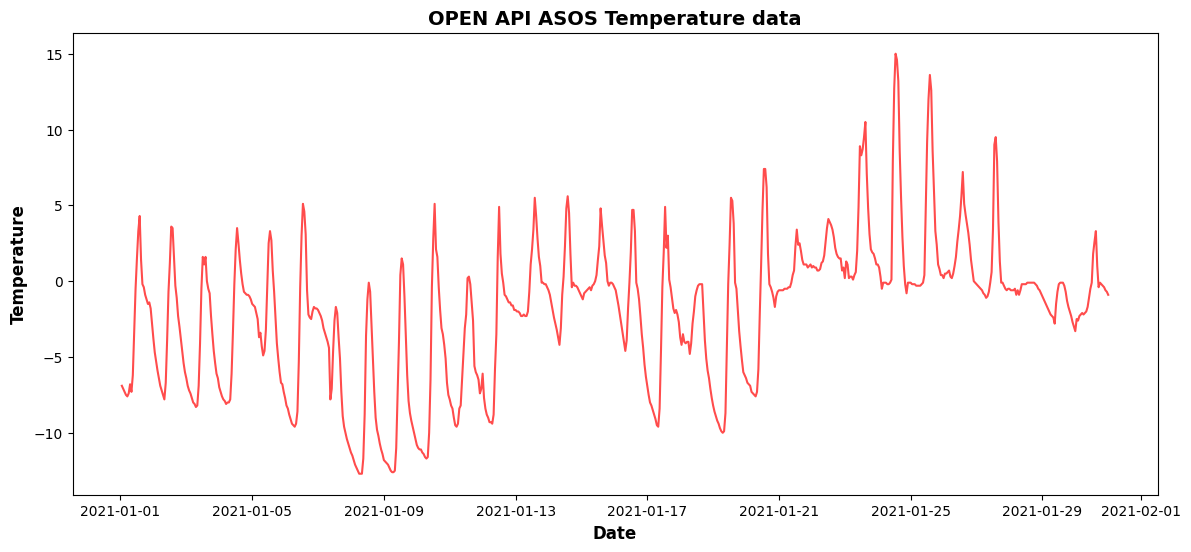

In [29]:
import matplotlib.pyplot as plt


df['tm']=pd.to_datetime(df['tm'])
df['ts'] = pd.to_numeric(df['ts'], downcast='float')

fig = plt.figure(figsize=(14,6))
ax = plt.subplot(1,1,1)

ax.plot(df['tm'],df['ts'],color='r',lw=1.5,alpha=0.7)
ax.set_ylabel('Temperature', fontweight='bold', fontsize=12)
ax.set_xlabel('Date', fontweight='bold', fontsize=12)
ax.set_title('OPEN API ASOS Temperature data', fontweight = 'bold',fontsize = 14)